# PROJECT TITLE  -CAR data eda ml
## Yusuf Sertkaya Student ID: 211805033


In [ ]:
# required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import warnings
import joblib  # 🔁 New import for saving the model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

warnings.filterwarnings('ignore')



In [ ]:
df = pd.read_csv('/Users/ysk/Downloads/software-develeopment-all-1--main 2/scraped_data/final_cleaned_dataset.csv',sep=',') #the final clean merged data that ı use
df

,seller_name,mileage,year,vehicle_condition,ad_date,fuel_tank,drive_type,fuel_consumption,series,paint_replaced,...,color,body_type,model,fuel_type,ad_url,seller_type,ad_id,location_2,engine_power,ad_price
0,FARUK G.,3000000.0,2004.0,İkinci El,25 Aralık 2024,63.0,Önden Çekiş,Unspecified,156,"1 değişen, 12 boyalı",...,Gri (Gümüş),Sedan,1.6 TS Distinctive,LPG & Benzin,https://www.arabam.com/ilan/sahibinden-satilik...,Sahibinden,27458049.0,Mersin,120.0,410000.0
1,MURAT K.,3520000.0,1999.0,İkinci El,25 Aralık 2024,63.0,Önden Çekiş,Unspecified,156,Tamamı boyalı,...,Gri,Sedan,2.0 TS,LPG & Benzin,https://www.arabam.com/ilan/sahibinden-satilik...,Sahibinden,23613767.0,Samsun,155.0,340750.0
2,CEMİL OKKAN D.,1850000.0,2011.0,İkinci El,25 Aralık 2024,60.0,Önden Çekiş,Unspecified,Giulietta,Tamamı orjinal,...,Beyaz,Hatchback/5,1.6 JTD Progression Plus,Dizel,https://www.arabam.com/ilan/sahibinden-satilik...,Sahibinden,27458725.0,Antalya,105.0,650000.0
3,Derin Oto Nazilli,999990.0,2017.0,İkinci El,25 Aralık 2024,60.0,Önden Çekiş,Unspecified,Giulietta,Belirtilmemiş,...,Altın,Hatchback/5,1.6 JTD Distinctive,Dizel,https://www.arabam.com/ilan/galeriden-satilik-...,Galeriden,27457620.0,Aydın,105.0,99999999.0
4,ŞAZİYE T.,1700000.0,2014.0,İkinci El,25 Aralık 2024,60.0,Önden Çekiş,Unspecified,Giulietta,1 boyalı,...,Kırmızı,Hatchback/5,1.6 JTD Distinctive,Dizel,https://www.arabam.com/ilan/sahibinden-satilik...,Sahibinden,26824239.0,Adana,105.0,715000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15160,Unknown,680000.0,2012.0,Unknown,Unknown,500.0,Unknown,4.1 (şi̇) / 3.8 (şd),Unknown,Unknown,...,beyaz,Unknown,Unknown,dizel,Unknown,Unknown,27149561.0,Unknown,115.0,1270000.0
15161,Unknown,942210.0,2012.0,Unknown,Unknown,590.0,Unknown,4.6 (şi̇) / 3.8 (şd),Unknown,Unknown,...,gri,Unknown,Unknown,dizel,Unknown,Unknown,27149561.0,Unknown,120.0,1269500.0
15162,Unknown,1099950.0,2012.0,Unknown,Unknown,500.0,Unknown,4.6 (şi̇) / 3.8 (şd),Unknown,Unknown,...,beyaz,Unknown,Unknown,dizel,Unknown,Unknown,27149561.0,Unknown,115.0,1265000.0
15163,Unknown,691090.0,2012.0,Unknown,Unknown,580.0,Unknown,7.3 (şi̇) / 5.4 (şd),Unknown,Unknown,...,gri,Unknown,Unknown,benzin,Unknown,Unknown,27149561.0,Unknown,150.0,1257000.0


In [23]:
# Display the first few rows and column names to understand the structure
df.head(), df.columns

(         seller_name    mileage    year vehicle_condition         ad_date  \
 0           FARUK G.  3000000.0  2004.0         İkinci El  25 Aralık 2024   
 1           MURAT K.  3520000.0  1999.0         İkinci El  25 Aralık 2024   
 2     CEMİL OKKAN D.  1850000.0  2011.0         İkinci El  25 Aralık 2024   
 3  Derin Oto Nazilli   999990.0  2017.0         İkinci El  25 Aralık 2024   
 4          ŞAZİYE T.  1700000.0  2014.0         İkinci El  25 Aralık 2024   
 
    fuel_tank   drive_type fuel_consumption     series        paint_replaced  \
 0       63.0  Önden Çekiş      Unspecified        156  1 değişen, 12 boyalı   
 1       63.0  Önden Çekiş      Unspecified        156         Tamamı boyalı   
 2       60.0  Önden Çekiş      Unspecified  Giulietta        Tamamı orjinal   
 3       60.0  Önden Çekiş      Unspecified  Giulietta         Belirtilmemiş   
 4       60.0  Önden Çekiş      Unspecified  Giulietta              1 boyalı   
 
    ...        color    body_type               

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15165 entries, 0 to 15164
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seller_name        15165 non-null  object 
 1   mileage            15165 non-null  float64
 2   year               15165 non-null  float64
 3   vehicle_condition  15165 non-null  object 
 4   ad_date            15165 non-null  object 
 5   fuel_tank          15165 non-null  float64
 6   drive_type         15165 non-null  object 
 7   fuel_consumption   15165 non-null  object 
 8   series             15165 non-null  object 
 9   paint_replaced     15165 non-null  object 
 10  engine_capacity    14887 non-null  float64
 11  trade_in           15165 non-null  object 
 12  transmission       15165 non-null  object 
 13  location_1         15165 non-null  object 
 14  brand              15165 non-null  object 
 15  color              15165 non-null  object 
 16  body_type          151

In [25]:
print(df.columns)


Index(['seller_name', 'mileage', 'year', 'vehicle_condition', 'ad_date',
       'fuel_tank', 'drive_type', 'fuel_consumption', 'series',
       'paint_replaced', 'engine_capacity', 'trade_in', 'transmission',
       'location_1', 'brand', 'color', 'body_type', 'model', 'fuel_type',
       'ad_url', 'seller_type', 'ad_id', 'location_2', 'engine_power',
       'ad_price'],
      dtype='object')


In [27]:
print(df.describe())


            mileage          year     fuel_tank  engine_capacity  \
count  1.516500e+04  15165.000000  15165.000000     1.488700e+04   
mean   1.736378e+06   2011.976921    153.578107     1.872208e+07   
std    7.565045e+06      5.914385    190.678419     5.305954e+07   
min    0.000000e+00   1951.000000     35.000000     0.000000e+00   
25%    7.900000e+05   2010.000000     55.000000     1.199000e+03   
50%    1.600000e+06   2012.000000     60.000000     1.595000e+03   
75%    2.370000e+06   2015.000000     70.000000     1.984000e+03   
max    7.777778e+08   2024.000000   1000.000000     5.501600e+08   

              ad_id  engine_power      ad_price  
count  1.516500e+04  15165.000000  1.516500e+04  
mean   2.697034e+07    136.374481  1.206299e+06  
std    8.283769e+05     56.319896  5.585159e+06  
min    6.497138e+06     50.000000  3.750000e+04  
25%    2.696689e+07    101.000000  5.300000e+05  
50%    2.714956e+07    124.000000  8.750000e+05  
75%    2.728870e+07    165.000000  1.

## Selected columns: to make plots
mileage

year

vehicle_condition

ad_date

fuel_tank (corrected from el_tank)

drive_type


series

paint_replaced



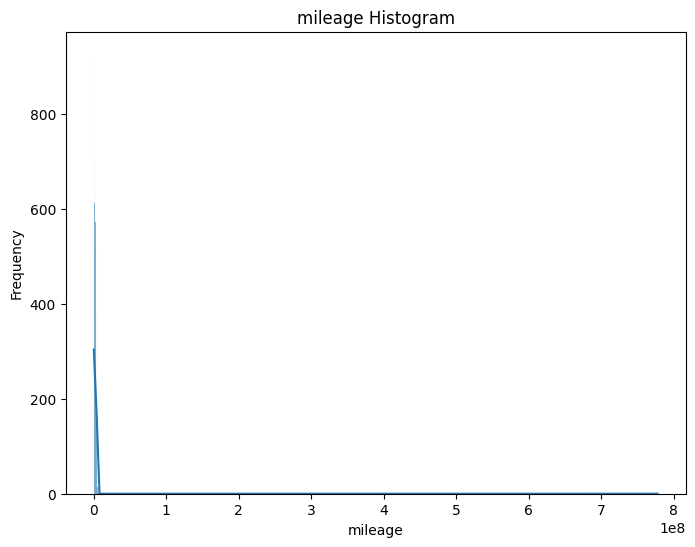

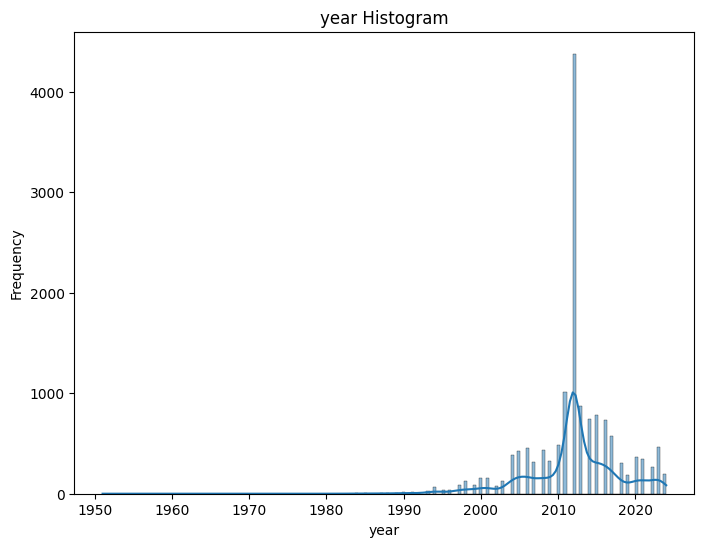

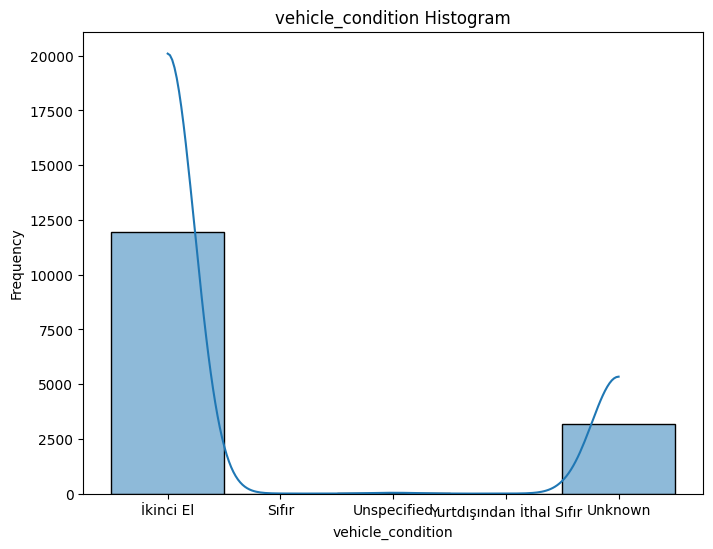

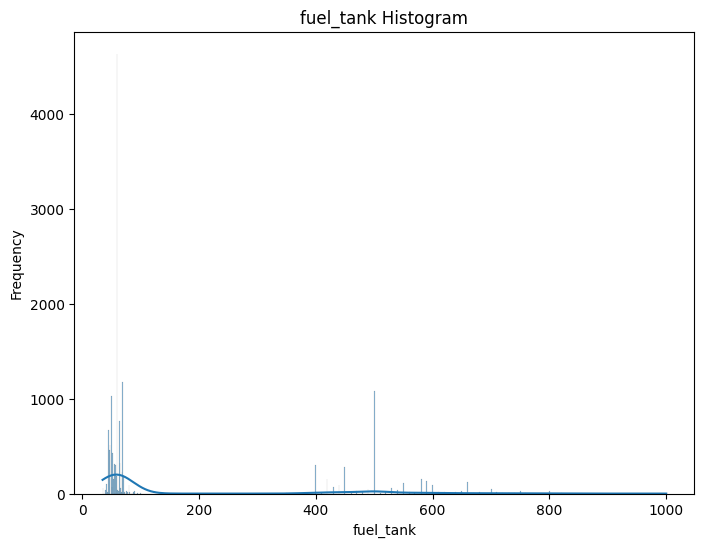

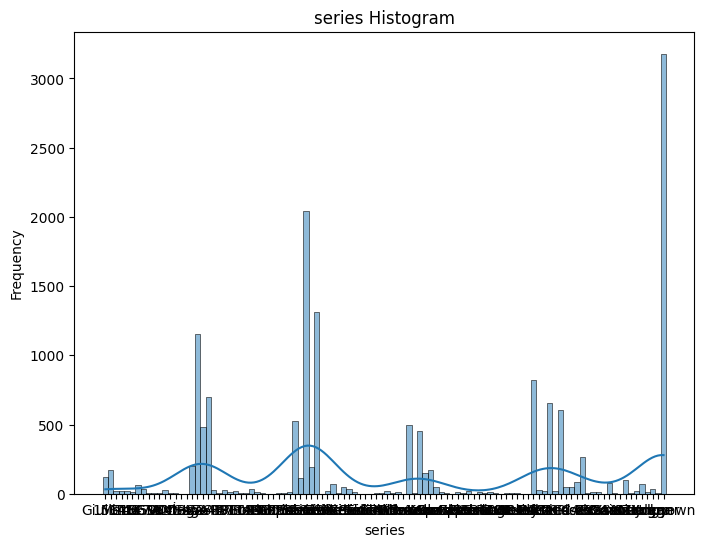

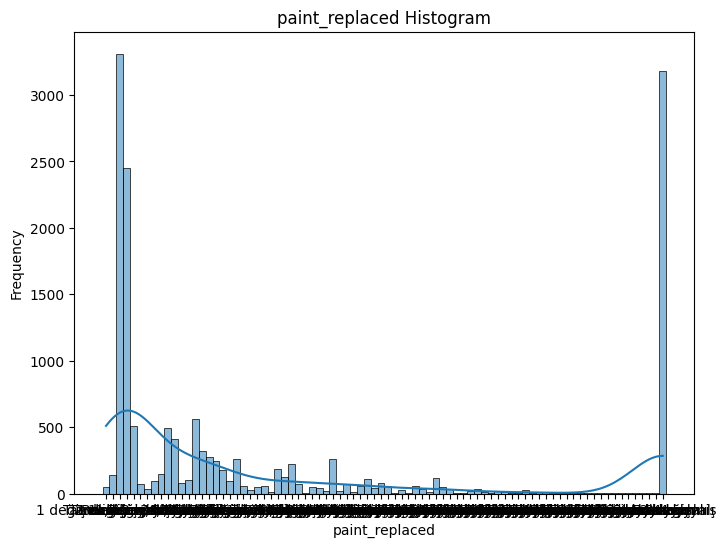

In [28]:


selected_columns = [
    'mileage', 'year', 'vehicle_condition', 
    'fuel_tank', 
    'series', 'paint_replaced'
]

for column in selected_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"{column} Histogram")
    plt.show()


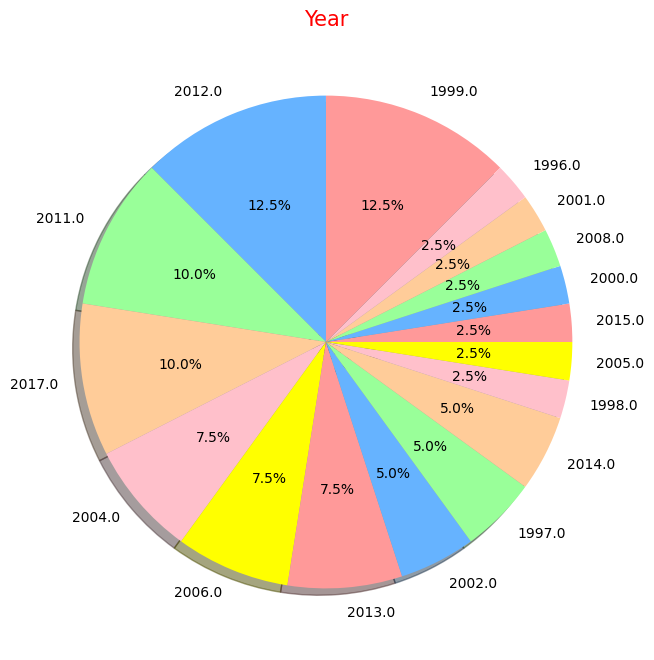

In [29]:
labels = df["year"][:40].value_counts().index
sizes = df["year"][:40].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('Year',color = 'red',fontsize = 15)
plt.show()

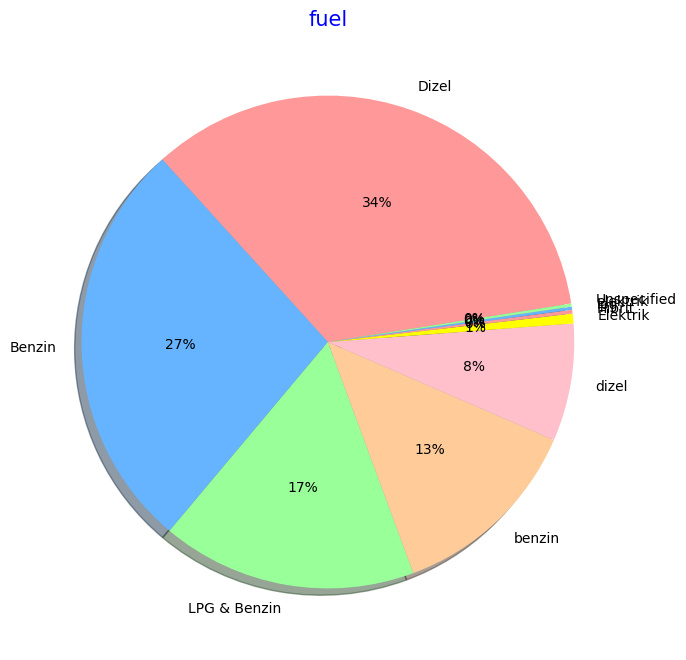

In [30]:
labels = df["fuel_type"].value_counts().index
sizes = df["fuel_type"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.f%%',colors=colors,shadow=True, startangle=9)
plt.title('fuel',color = 'blue',fontsize = 15)
plt.show()

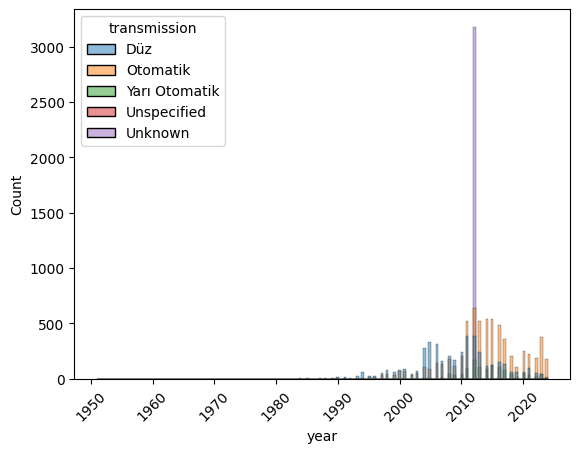

In [31]:
sns.histplot(data=df, x="year", hue="transmission")
plt.xticks(rotation=45)
plt.show()

## remove some columns to organize the data


## ad_Id,ad_date,ad_loc1,ad_loc2,brand,series,model,year,mileage,transmission,fuel_type,body_type,color,engine_capacity,engine_power,drive_type,vehicle_condition,fuel_consumption,fuel_tank,paint/replacement,trade_in,seller_type,ad_price

In [ ]:
# Check for missing values after conversion
print(df.isnull().sum())

seller_name            0
mileage                0
year                   0
vehicle_condition      0
ad_date                0
fuel_tank              0
drive_type             0
fuel_consumption       0
series                 0
paint_replaced         0
engine_capacity      278
trade_in               0
transmission           0
location_1             0
brand                  0
color                  0
body_type              0
model                  0
fuel_type              0
ad_url                 0
seller_type            0
ad_id                  0
location_2             0
engine_power           0
ad_price               0
dtype: int64


## a function to check data quality

In [ ]:
def check_data_quality(df):
    """Perform comprehensive data quality checks"""
    print("\n=== Data Quality Report ===")
    
    # Missing values
    print("\nMissing values:")
    print(df.isnull().sum())
    
    # Zero/missing prices
    zero_prices = (df['ad_price'] == 0).sum()
    print(f"\nRows with zero price: {zero_prices}")
    
    # Suspiciously low/high prices
    q1 = df['ad_price'].quantile(0.01)
    q99 = df['ad_price'].quantile(0.99)
    print(f"\nPrice distribution (1st-99th percentile): {q1:.2f} - {q99:.2f}")
    
    # Year validity
    current_year = pd.Timestamp.now().year
    invalid_years = ((df['year'] < 1950) | (df['year'] > current_year)).sum()
    print(f"\nRows with invalid year: {invalid_years}")
    
    # Mileage validity
    invalid_mileage = (df['mileage'] <= 0).sum()
    print(f"\nRows with invalid mileage: {invalid_mileage}")

check_data_quality(df)


=== Data Quality Report ===

Missing values:
seller_name             3179
mortgage               11986
mileage                    1
year                    3179
area_of_use            11986
vehicle_condition       3179
ad_date                 3179
lr_fender_status       11986
fuel_tank                 30
roof_status            11986
lf_fender_status       11986
front_bumper_status    11986
inspection             11986
luggage_volume         12175
confiscation           11986
Brand                  11986
drive_type              3179
rf_door_status         11986
Model                  11986
fuel_consumption           0
rr_door_status         11986
series                  3179
paint_replaced          3179
engine_capacity            0
lf_door_status         11986
lr_door_status         11986
foreign_currency       11986
trade_in                3179
transmission            3179
location_1              3179
brand                   3179
hood_status            11986
color                     

## final data prep

## remove cc and km in the dataset

In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv("cleaned_dataset_for_ml.csv")

# Clean 'mileage' column (remove non-digit characters, then convert to float)
df['mileage'] = (
    df['mileage']
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)

# Clean 'engine_capacity' column similarly if it exists
if 'engine_capacity' in df.columns:
    df['engine_capacity'] = (
        df['engine_capacity']
        .astype(str)
        .str.replace(r'[^0-9]', '', regex=True)
        .replace('', np.nan)
        .astype(float)
    )

# Save the final cleaned dataset
df.to_csv("final_cleaned_dataset.csv", index=False)
print("Final cleaned dataset saved as final_cleaned_dataset.csv")


Final cleaned dataset saved as final_cleaned_dataset.csv



---

### 🔧 `preprocess_data_for_classification(data)` – Summary

Prepares a vehicle ads dataset for classification:

* Replaces `'Unspecified'` values with `NaN`.
* Converts selected columns to numeric types (`mileage`, `year`, `engine_power`, etc.).
* Adds `vehicle_age` as `2025 - year`.
* Creates `is_original` flag if paint is marked as "orjinal".
* Bins `ad_price` into 5 price categories: Very Low → Premium.
* Drops irrelevant or leaking columns (`ad_url`, `seller_name`, `ad_price`, etc.).

Returns a cleaned and feature-engineered DataFrame ready for modeling.

---



In [ ]:
# Function to preprocess data for classification
def preprocess_data_for_classification(data):
    data = data.replace('Unspecified', np.nan)
    
    numeric_columns = ['mileage', 'year', 'fuel_tank', 'engine_capacity', 'engine_power', 'ad_price']
    for col in numeric_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    
    data['vehicle_age'] = 2025 - data['year']
    
    data['is_original'] = data['paint_replaced'].apply(
        lambda x: 1 if pd.notna(x) and 'orjinal' in str(x).lower() else 0
    )
    
    price_ranges = [0, 500000, 750000, 1000000, 1500000, float('inf')]
    price_labels = ['Very Low', 'Low', 'Medium', 'High', 'Premium']
    data['price_category'] = pd.cut(data['ad_price'], bins=price_ranges, labels=price_labels)
    
    cols_to_drop = ['ad_url', 'ad_id', 'seller_name', 'ad_date', 'paint_replaced', 'location_1', 'location_2', 'ad_price']
    data = data.drop(cols_to_drop, axis=1)
    
    return data



---


### 📈 `evaluate_classification_model(...)` – Summary

Evaluates a classification model using standard metrics:

* **Inputs**:
  `model`, `X_test`, `y_test`, `model_name`, and a shared `results_dict`.

* **Outputs**:

  * Computes **Accuracy**, **Precision**, **Recall**, **F1 Score** (weighted).
  * Stores metrics in `results_dict` under `model_name`.
  * Prints Accuracy and F1 Score.
  * Returns predicted labels (`y_pred`).

Useful for comparing multiple models efficiently.

---




In [ ]:
# Function to evaluate classification models
def evaluate_classification_model(model, X_test, y_test, model_name, results_dict):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results_dict[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
    return y_pred



---

### 🧪 `compare_classification_models(data)` – Summary

Trains, evaluates, and compares multiple classification models:

* **Preprocessing**:

  * Cleans data with `preprocess_data_for_classification()`.
  * Encodes the target (`price_category`) using `LabelEncoder`.
  * Splits data into train/test with stratification.
  * Applies pipelines for numeric + categorical features (imputation, scaling, encoding).

* **Models Compared**:

  * Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, SVC, XGBoost, LightGBM.

* **Evaluation**:

  * Uses `evaluate_classification_model()` to compute Accuracy, Precision, Recall, F1.
  * Logs training time and saves all predictions.

* **Final Step**:

  * Selects best model (by Accuracy), retrains it, and saves it as a `.joblib` file.

**Returns**:
`results`, `predictions`, `training_times`, `X_test`, `y_test`, and the label encoder (`le`).

---



In [ ]:
# Main function to train and compare classification models
def compare_classification_models(data):
    processed_data = preprocess_data_for_classification(data)
    
    le = LabelEncoder()
    processed_data['price_category'] = le.fit_transform(processed_data['price_category'])
    
    X = processed_data.drop('price_category', axis=1)
    y = processed_data['price_category']
    
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'SVC': SVC(kernel='rbf', probability=True, random_state=42),
        'XGBoost': XGBClassifier(n_estimators=100, random_state=42),
        'LightGBM': LGBMClassifier(n_estimators=100, random_state=42)
    }
    
    results = {}
    predictions = {}
    training_times = {}
    
    print("Training and evaluating classification models...")
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        start_time = time.time()
        pipeline.fit(X_train, y_train)
        end_time = time.time()
        
        training_time = end_time - start_time
        training_times[name] = training_time
        
        print(f"Training completed in {training_time:.2f} seconds")
        
        pred = evaluate_classification_model(pipeline, X_test, y_test, name, results)
        predictions[name] = pred
    
    # Select best model
    best_model = max(results, key=lambda k: results[k]['Accuracy'])
    
    # Re-train best model to save it
    print(f"\nRetraining best model: {best_model}")
    best_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', models[best_model])
    ])
    best_pipeline.fit(X_train, y_train)
    
    # Save the model as .pkl
    filename = f"{best_model.replace(' ', '_').lower()}_classifier.joblib"
    joblib.dump(best_pipeline, filename)
    print(f"\nBest model '{best_model}' saved as: {filename}")
    
    return results, predictions, training_times, X_test, y_test, le


---


### 📊 `visualize_classification_results(...)` – Summary

Visualizes and summarizes classification model performance:

* **Bar Charts**:

  * Plots **Accuracy**, **F1 Score**, **Precision**, and **Training Time** for all models.

* **Confusion Matrices**:

  * Shows confusion matrices for the **top 3 models** based on Accuracy.

* **Console Output**:

  * Prints a summary table of all metrics and training times.
  * Highlights the **best model** based on Accuracy.

**Returns**:
Name of the best-performing model.

---


In [ ]:
# Function to visualize classification results
def visualize_classification_results(results, predictions, training_times, X_test, y_test, label_encoder):
    results_df = pd.DataFrame({model: metrics for model, metrics in results.items()}).T
    results_df = results_df.sort_values('Accuracy', ascending=False)
    
    plt.figure(figsize=(14, 8))
    
    plt.subplot(2, 2, 1)
    plt.barh(results_df.index, results_df['Accuracy'], color='skyblue')
    plt.title('Accuracy by Model (Higher is Better)')
    plt.xlabel('Accuracy')
    plt.xlim(0, 1)
    plt.tight_layout()
    
    plt.subplot(2, 2, 2)
    plt.barh(results_df.index, results_df['F1 Score'], color='lightgreen')
    plt.title('F1 Score by Model (Higher is Better)')
    plt.xlabel('F1 Score')
    plt.xlim(0, 1)
    plt.tight_layout()
    
    plt.subplot(2, 2, 3)
    plt.barh(results_df.index, results_df['Precision'], color='salmon')
    plt.title('Precision by Model (Higher is Better)')
    plt.xlabel('Precision')
    plt.xlim(0, 1)
    plt.tight_layout()
    
    plt.subplot(2, 2, 4)
    times_df = pd.Series(training_times)
    plt.barh(times_df.index, times_df.values, color='orchid')
    plt.title('Training Time by Model (Seconds)')
    plt.xlabel('Time (s)')
    plt.tight_layout()
    
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.tight_layout()
    
    plt.figure(figsize=(15, 12))
    top_models = results_df.head(3).index
    class_names = label_encoder.classes_
    
    for i, model in enumerate(top_models):
        plt.subplot(2, 2, i+1)
        cm = confusion_matrix(y_test, predictions[model])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=class_names, yticklabels=class_names)
        plt.title(f'Confusion Matrix - {model}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
    
    print("\nClassification Model Performance Summary:")
    print(results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']])
    
    print("\nTraining Times (seconds):")
    for model, t in sorted(training_times.items(), key=lambda x: x[1]):
        print(f"{model}: {t:.2f}s")
    
    best_model = results_df['Accuracy'].idxmax()
    print(f"\nBest classification model based on Accuracy: {best_model}")
    return best_model


Training and evaluating classification models...

Training Logistic Regression...
Training completed in 0.98 seconds
Logistic Regression - Accuracy: 0.8005, F1 Score: 0.8012

Training Decision Tree...
Training completed in 0.19 seconds
Decision Tree - Accuracy: 0.7540, F1 Score: 0.7566

Training Random Forest...
Training completed in 7.10 seconds
Random Forest - Accuracy: 0.8137, F1 Score: 0.8141

Training Gradient Boosting...
Training completed in 10.93 seconds
Gradient Boosting - Accuracy: 0.7864, F1 Score: 0.7843

Training SVC...
Training completed in 26.29 seconds
SVC - Accuracy: 0.7873, F1 Score: 0.7890

Training XGBoost...
Training completed in 1.06 seconds
XGBoost - Accuracy: 0.8249, F1 Score: 0.8255

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[

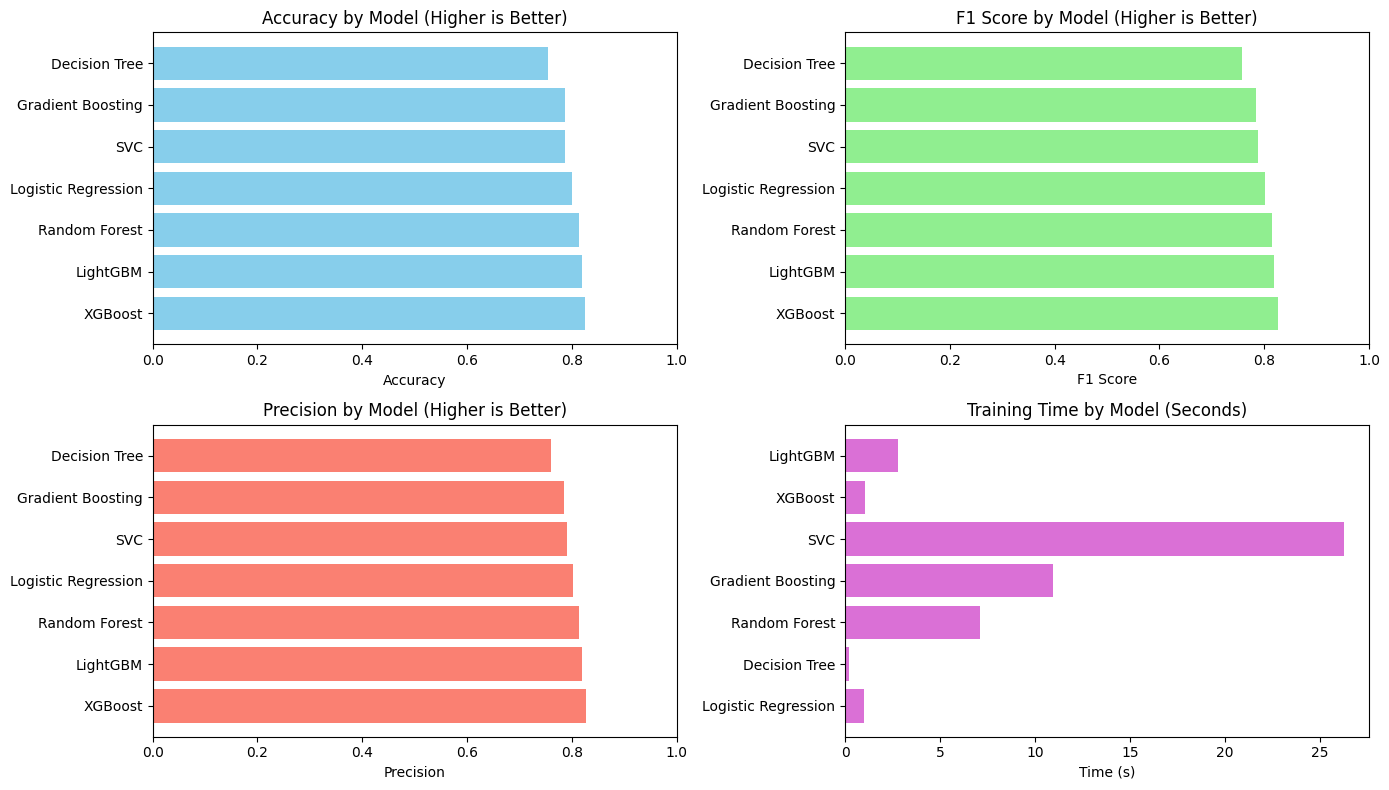

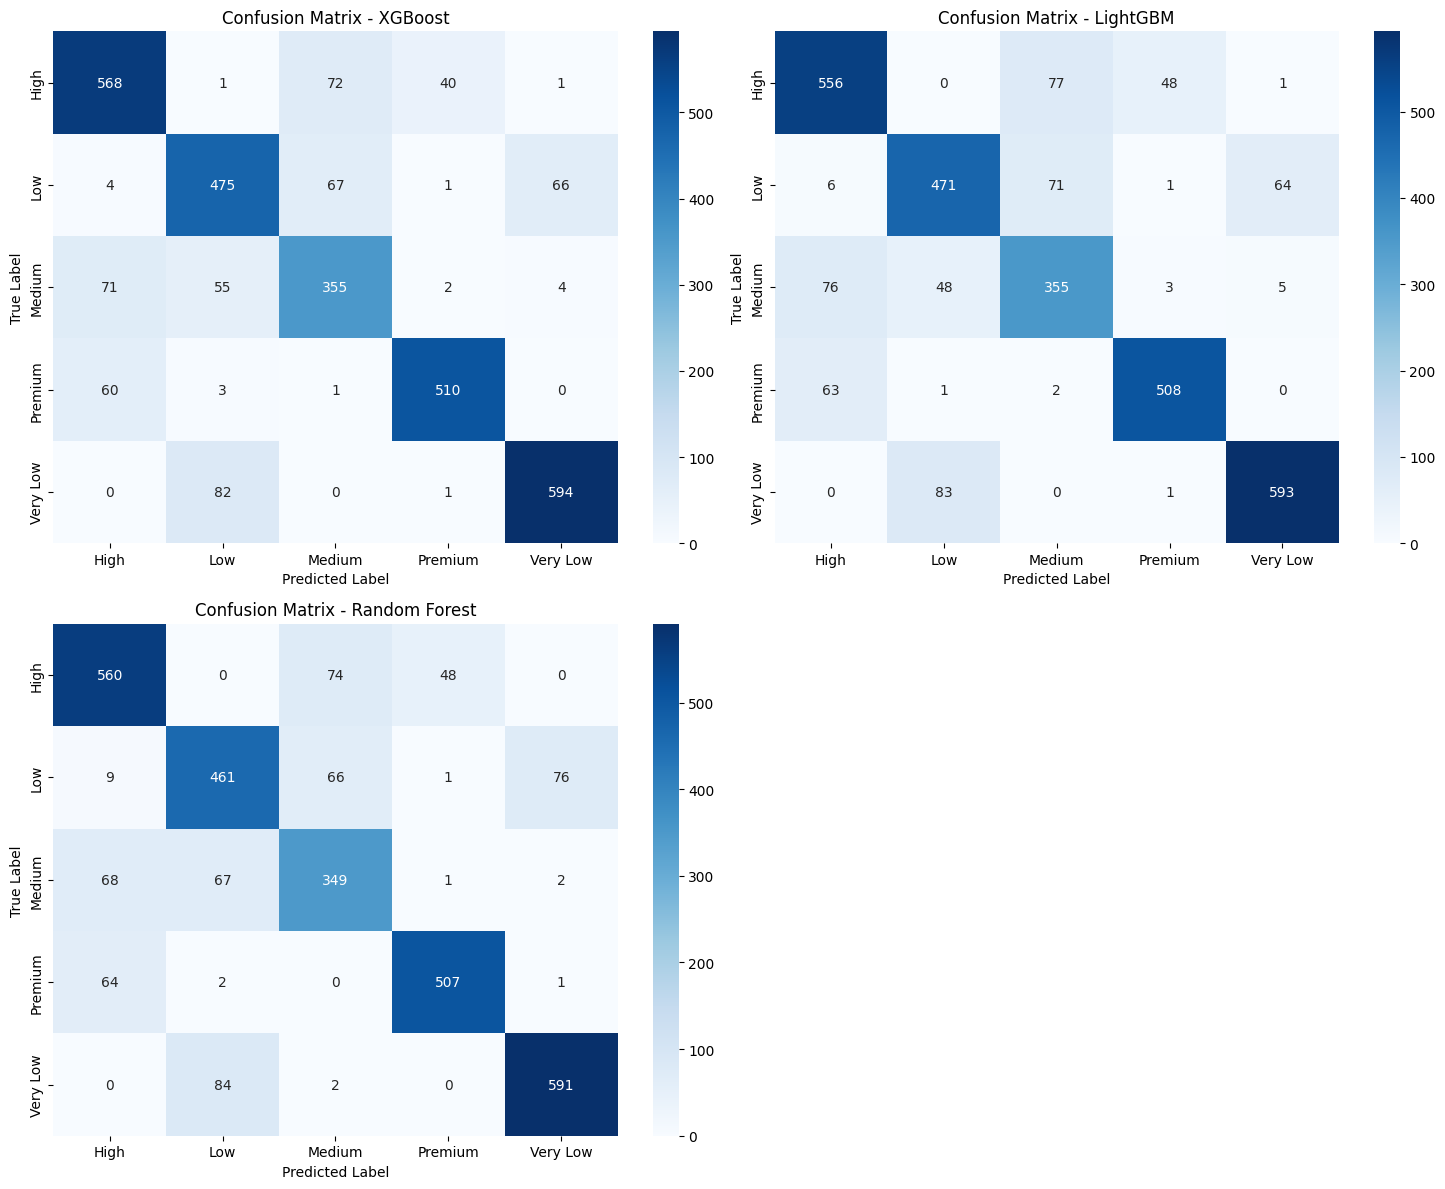

In [20]:
# Load your dataset (replace this with your actual file path or DataFrame)
data = pd.read_csv("/Users/ysk/Downloads/software-develeopment-all-1--main 2/scraped_data/final_cleaned_dataset.csv")

# Run the comparison and save best model
results, predictions, training_times, X_test, y_test, label_encoder = compare_classification_models(data)

# Visualize performance and get best model name
best_model_name = visualize_classification_results(results, predictions, training_times, X_test, y_test, label_encoder)
